In [1]:
# Cell 0 - Preparation: load packages, set some basic options  
%matplotlib inline
from obspy import *
from obspy.clients.fdsn import Client
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 4
plt.rcParams['lines.linewidth'] = 0.5

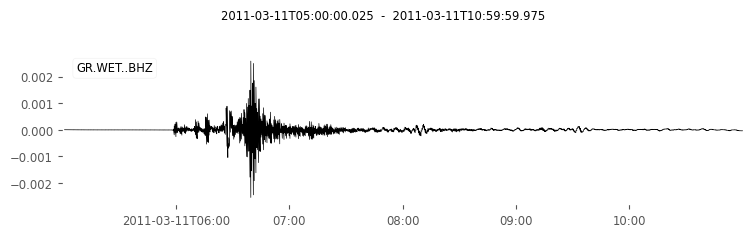

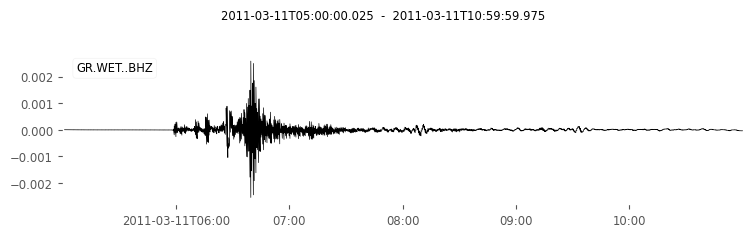

In [2]:
# Cell 1: prepare data from Tohoku earthquake. 
client = Client("BGR")
t1 = UTCDateTime("2011-03-11T05:00:00.000")
st = client.get_waveforms("GR", "WET", "", "BHZ", t1, t1 + 6 * 60 * 60, 
                          attach_response = True)
st.remove_response(output="VEL")
st.detrend('linear')
st.detrend('demean')
st.plot()

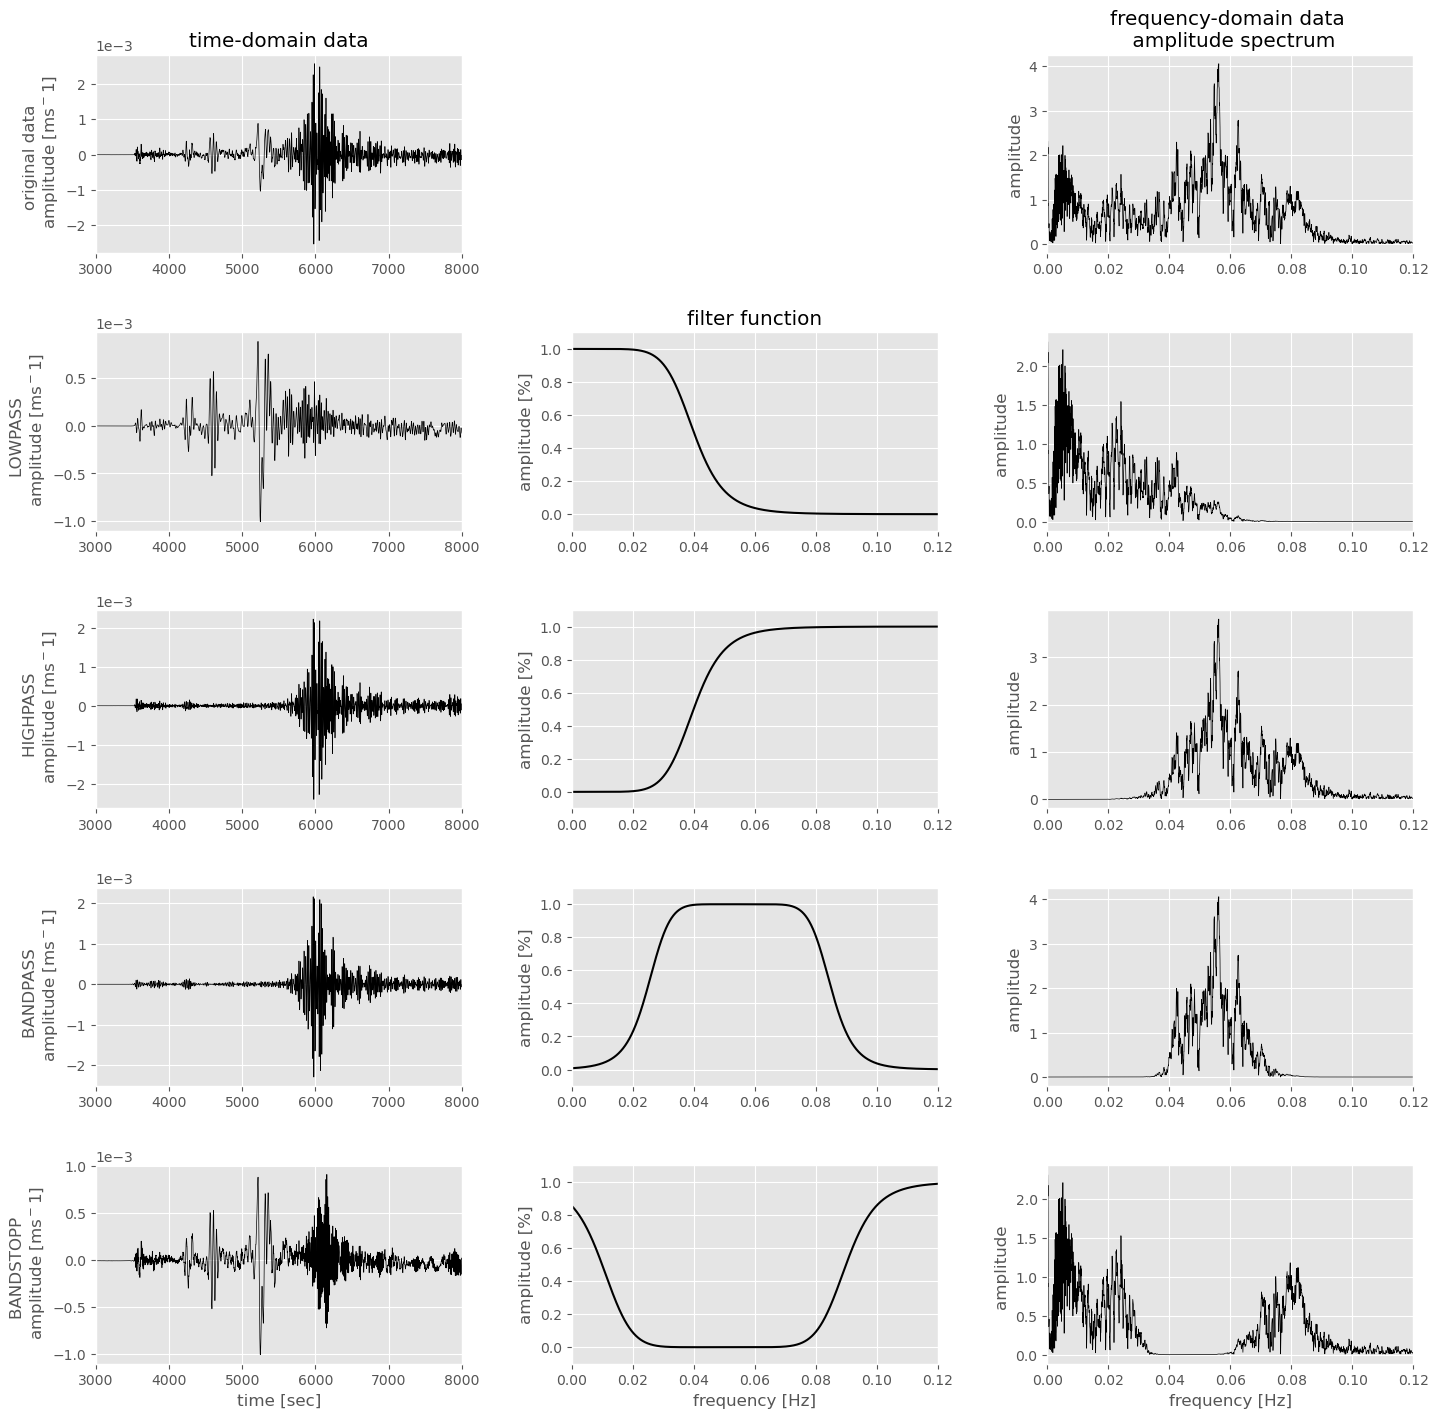

In [3]:
# Cell 2 - filter types
npts = st[0].stats.npts                   # number of samples in the trace
dt = st[0].stats.delta                    # sample interval
fNy = 1. / (2. * dt)                      # Nyquist frequency
time = np.arange(0, npts) * dt            # time axis for plotting
freq = np.linspace(0, fNy, npts // 2 + 1) # frequency axis for plotting
corners = 4                               # order of filter
# several filter frequencies for the different filter types
f0 = 0.04
fmin1 = 0.04
fmax1 = 0.07
fmin2 = 0.03
fmax2 = 0.07

# filter functions
LP = 1 / ( 1 + (freq / f0) ** (2 * corners))
HP = 1 - 1 / (1 + (freq / f0) ** (2 * corners))
wc = fmax1 - fmin1
wb = 0.5 * wc + fmin1
BP = 1/(1 + ((freq - wb) / wc) ** (2 * corners))
wc = fmax2 - fmin2
wb = 0.5 * wc + fmin2
BS = 1 - ( 1 / (1 + ((freq - wb) / wc) ** (2 * corners)))

# filtered traces
stHP = st.copy()
stHP.filter('highpass', freq=f0, corners=corners, zerophase=True)
stLP = st.copy()
stLP.filter('lowpass', freq=f0, corners=corners, zerophase=True)
stBP = st.copy()
stBP.filter('bandpass', freqmin=fmin1, freqmax=fmax1, corners=corners, zerophase=True)
stBS = st.copy()
stBS.filter('bandstop', freqmin=fmin2, freqmax=fmax2, corners=corners, zerophase=True)

# amplitude spectras
Ospec = np.fft.rfft(st[0].data)
LPspec = np.fft.rfft(stLP[0].data)
HPspec = np.fft.rfft(stHP[0].data)
BPspec = np.fft.rfft(stBP[0].data)
BSspec = np.fft.rfft(stBS[0].data)

# ---------------------------------------------------------------
# plot
plt.rcParams['figure.figsize'] = 17, 17
tx1 = 3000
tx2 = 8000
fx2 = 0.12

fig = plt.figure()

ax1 = fig.add_subplot(5,3,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, st[0].data, 'k')
plt.xlim(tx1, tx2)
plt.title('time-domain data')
plt.ylabel('original data \n amplitude [ms$^-1$]')

ax3 = fig.add_subplot(5,3,3)
plt.plot(freq, abs(Ospec), 'k')
plt.title('frequency-domain data \n amplitude spectrum')
plt.ylabel('amplitude')
plt.xlim(0,fx2)

ax4 = fig.add_subplot(5,3,4)
ax4.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stLP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('LOWPASS  \n amplitude [ms$^-1$]')

ax5 = fig.add_subplot(5,3,5)
plt.plot(freq, LP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.title('filter function')
plt.ylabel('amplitude [%]')

ax6 = fig.add_subplot(5,3,6)
plt.plot(freq, abs(LPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax7 = fig.add_subplot(5,3,7)
ax7.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stHP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('HIGHPASS  \n amplitude [ms$^-1$]')

ax8 = fig.add_subplot(5,3,8)
plt.plot(freq, HP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')

ax9 = fig.add_subplot(5,3,9)
plt.plot(freq, abs(HPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax10 = fig.add_subplot(5,3,10)
ax10.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stBP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('BANDPASS  \n amplitude [ms$^-1$]')

ax11 = fig.add_subplot(5,3,11)
plt.plot(freq, BP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')

ax12 = fig.add_subplot(5,3,12)
plt.plot(freq, abs(BPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax13 = fig.add_subplot(5,3,13)
ax13.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stBS[0].data, 'k')
plt.xlim(tx1, tx2)
plt.xlabel('time [sec]')
plt.ylabel('BANDSTOPP \n amplitude [ms$^-1$]')

ax14 = fig.add_subplot(5,3,14)
plt.plot(freq, BS, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')
plt.xlabel('frequency [Hz]')

ax15 = fig.add_subplot(5,3,15)
plt.plot(freq, abs(BSspec), 'k')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

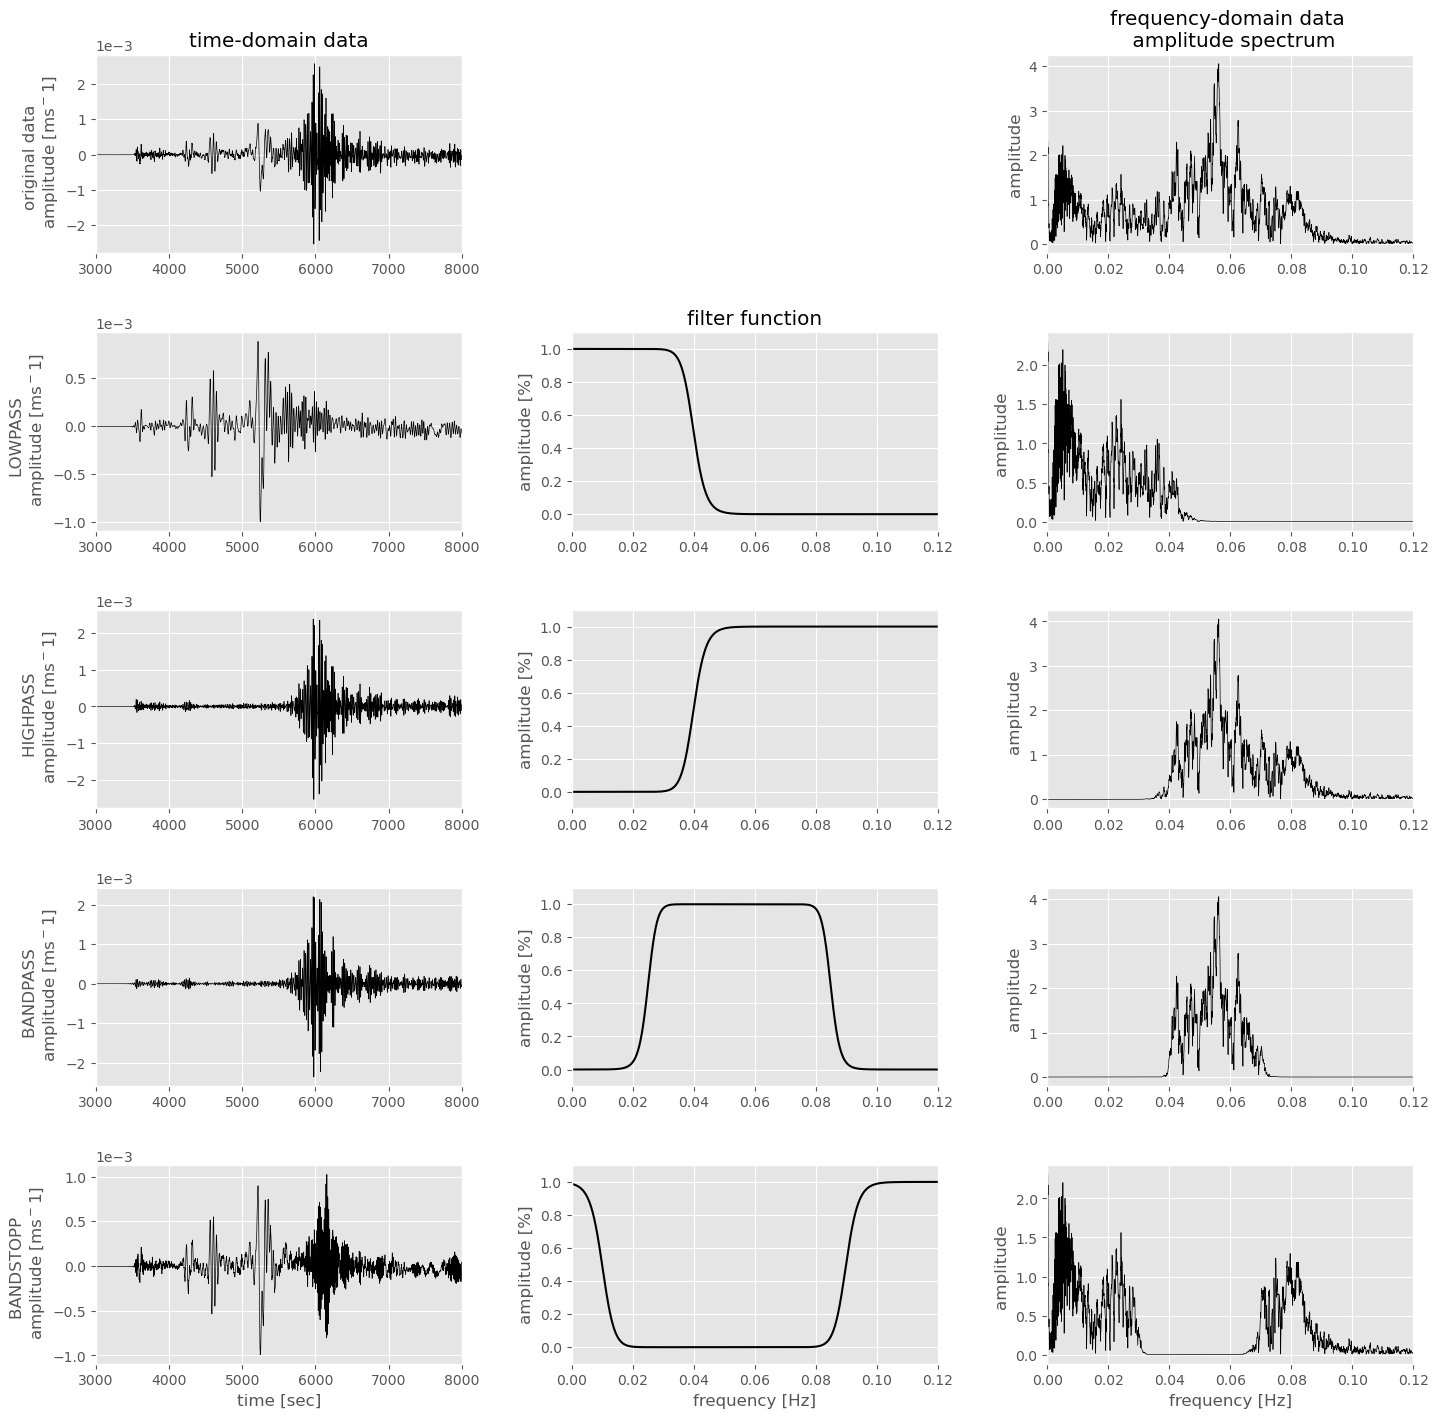

In [5]:
# Cell 2 - filter types
npts = st[0].stats.npts                   # number of samples in the trace
dt = st[0].stats.delta                    # sample interval
fNy = 1. / (2. * dt)                      # Nyquist frequency
time = np.arange(0, npts) * dt            # time axis for plotting
freq = np.linspace(0, fNy, npts // 2 + 1) # frequency axis for plotting
corners = 10                               # order of filter
# several filter frequencies for the different filter types
f0 = 0.04
fmin1 = 0.04
fmax1 = 0.07
fmin2 = 0.03
fmax2 = 0.07

# filter functions
LP = 1 / ( 1 + (freq / f0) ** (2 * corners))
HP = 1 - 1 / (1 + (freq / f0) ** (2 * corners))
wc = fmax1 - fmin1
wb = 0.5 * wc + fmin1
BP = 1/(1 + ((freq - wb) / wc) ** (2 * corners))
wc = fmax2 - fmin2
wb = 0.5 * wc + fmin2
BS = 1 - ( 1 / (1 + ((freq - wb) / wc) ** (2 * corners)))

# filtered traces
stHP = st.copy()
stHP.filter('highpass', freq=f0, corners=corners, zerophase=True)
stLP = st.copy()
stLP.filter('lowpass', freq=f0, corners=corners, zerophase=True)
stBP = st.copy()
stBP.filter('bandpass', freqmin=fmin1, freqmax=fmax1, corners=corners, zerophase=True)
stBS = st.copy()
stBS.filter('bandstop', freqmin=fmin2, freqmax=fmax2, corners=corners, zerophase=True)

# amplitude spectras
Ospec = np.fft.rfft(st[0].data)
LPspec = np.fft.rfft(stLP[0].data)
HPspec = np.fft.rfft(stHP[0].data)
BPspec = np.fft.rfft(stBP[0].data)
BSspec = np.fft.rfft(stBS[0].data)

# ---------------------------------------------------------------
# plot
plt.rcParams['figure.figsize'] = 17, 17
tx1 = 3000
tx2 = 8000
fx2 = 0.12

fig = plt.figure()

ax1 = fig.add_subplot(5,3,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, st[0].data, 'k')
plt.xlim(tx1, tx2)
plt.title('time-domain data')
plt.ylabel('original data \n amplitude [ms$^-1$]')

ax3 = fig.add_subplot(5,3,3)
plt.plot(freq, abs(Ospec), 'k')
plt.title('frequency-domain data \n amplitude spectrum')
plt.ylabel('amplitude')
plt.xlim(0,fx2)

ax4 = fig.add_subplot(5,3,4)
ax4.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stLP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('LOWPASS  \n amplitude [ms$^-1$]')

ax5 = fig.add_subplot(5,3,5)
plt.plot(freq, LP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.title('filter function')
plt.ylabel('amplitude [%]')

ax6 = fig.add_subplot(5,3,6)
plt.plot(freq, abs(LPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax7 = fig.add_subplot(5,3,7)
ax7.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stHP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('HIGHPASS  \n amplitude [ms$^-1$]')

ax8 = fig.add_subplot(5,3,8)
plt.plot(freq, HP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')

ax9 = fig.add_subplot(5,3,9)
plt.plot(freq, abs(HPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax10 = fig.add_subplot(5,3,10)
ax10.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stBP[0].data, 'k')
plt.xlim(tx1, tx2)
plt.ylabel('BANDPASS  \n amplitude [ms$^-1$]')

ax11 = fig.add_subplot(5,3,11)
plt.plot(freq, BP, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')

ax12 = fig.add_subplot(5,3,12)
plt.plot(freq, abs(BPspec), 'k')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

ax13 = fig.add_subplot(5,3,13)
ax13.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(time, stBS[0].data, 'k')
plt.xlim(tx1, tx2)
plt.xlabel('time [sec]')
plt.ylabel('BANDSTOPP \n amplitude [ms$^-1$]')

ax14 = fig.add_subplot(5,3,14)
plt.plot(freq, BS, 'k', linewidth=1.5)
plt.xlim(0,fx2)
plt.ylim(-0.1,1.1)
plt.ylabel('amplitude [%]')
plt.xlabel('frequency [Hz]')

ax15 = fig.add_subplot(5,3,15)
plt.plot(freq, abs(BSspec), 'k')
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude ')
plt.xlim(0,fx2)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


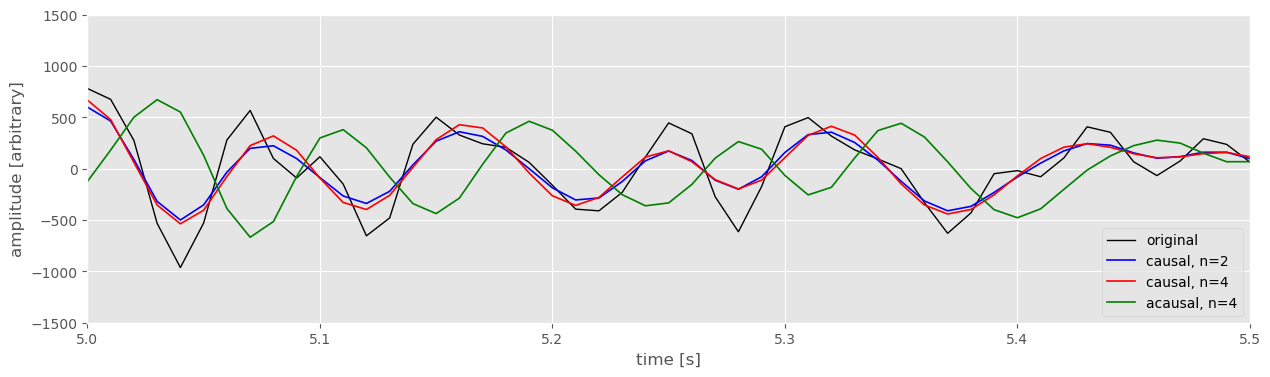

In [7]:
# Cell 3 - filter effects
stf = read()                   # load example seismogram
tr = stf[0]                    # select the first trace in the Stream object
tr.detrend('demean')           # preprocess data
tr.detrend('linear')
tr.filter("highpass", freq=2)  # removing long-period noise
print(tr)
t = tr.times()                 # time vector for x axis

f = 15.0                       # frequency for filters (intial: 10 Hz)
start = 5                      # start time to plot in sec (initial: 4)
end = 5.5                        # end time to plot in sec (initial: 8)
amp = 1500                     # amplitude range for plotting (initial: 1500)  
ncorners = 4                   # number of corners/order of the filter (initial: 4)

tr_filt = tr.copy()            # causal filter / not zero phase. Order = 2
tr_filt.filter('lowpass', freq=f, zerophase=True, corners=2)
tr_filt2 = tr.copy()           # causal filter / not zero phase. Order = set by ncorners
tr_filt2.filter('lowpass', freq=f, zerophase=True, corners=ncorners)
tr_filt3 = tr.copy()           # acausal filter / zero phase. Order = set by ncorners
tr_filt3.filter('lowpass', freq=f, zerophase=False, corners=ncorners)

# plot - comment single lines to better see the remaining ones
plt.rcParams['figure.figsize'] = 15, 4
plt.plot(t, tr.data, 'k', label='original', linewidth=1.)
plt.plot(t, tr_filt.data, 'b', label='causal, n=2', linewidth=1.2)
plt.plot(t, tr_filt2.data, 'r', label='causal, n=%s' % ncorners, linewidth=1.2)
plt.plot(t, tr_filt3.data, 'g', label='acausal, n=%s' % ncorners, linewidth=1.2)

plt.xlabel('time [s]')
plt.xlim(start, end)    
plt.ylim(-amp, amp)
plt.ylabel('amplitude [arbitrary]')
plt.legend(loc='lower right')

plt.show()

In [8]:
# Cell 4 - get + preprocess data
c = Client("IRIS")
tmp1 = UTCDateTime("1989-07-08T03:40:00.0")
tmp2 = UTCDateTime("1989-07-08T04:05:00.0")
dat = c.get_waveforms("CD", "WMQ", "", "BH*", tmp1, tmp2, attach_response = True)
dat.detrend('linear')
dat.detrend('demean')
dat.remove_response(output="VEL")
dat.detrend('linear')
dat.detrend('demean')
print(dat)
#dat.plot()

3 Trace(s) in Stream:
CD.WMQ..BHE | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples
CD.WMQ..BHN | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples
CD.WMQ..BHZ | 1989-07-08T03:48:37.790000Z - 1989-07-08T04:04:41.040000Z | 20.0 Hz, 19266 samples


/home/gaia/anaconda3/envs/test/lib/python3.9/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (10.0) of bandpass is at or above Nyquist (10.0). Applying a high-pass instead.
  warnings.warn(msg)


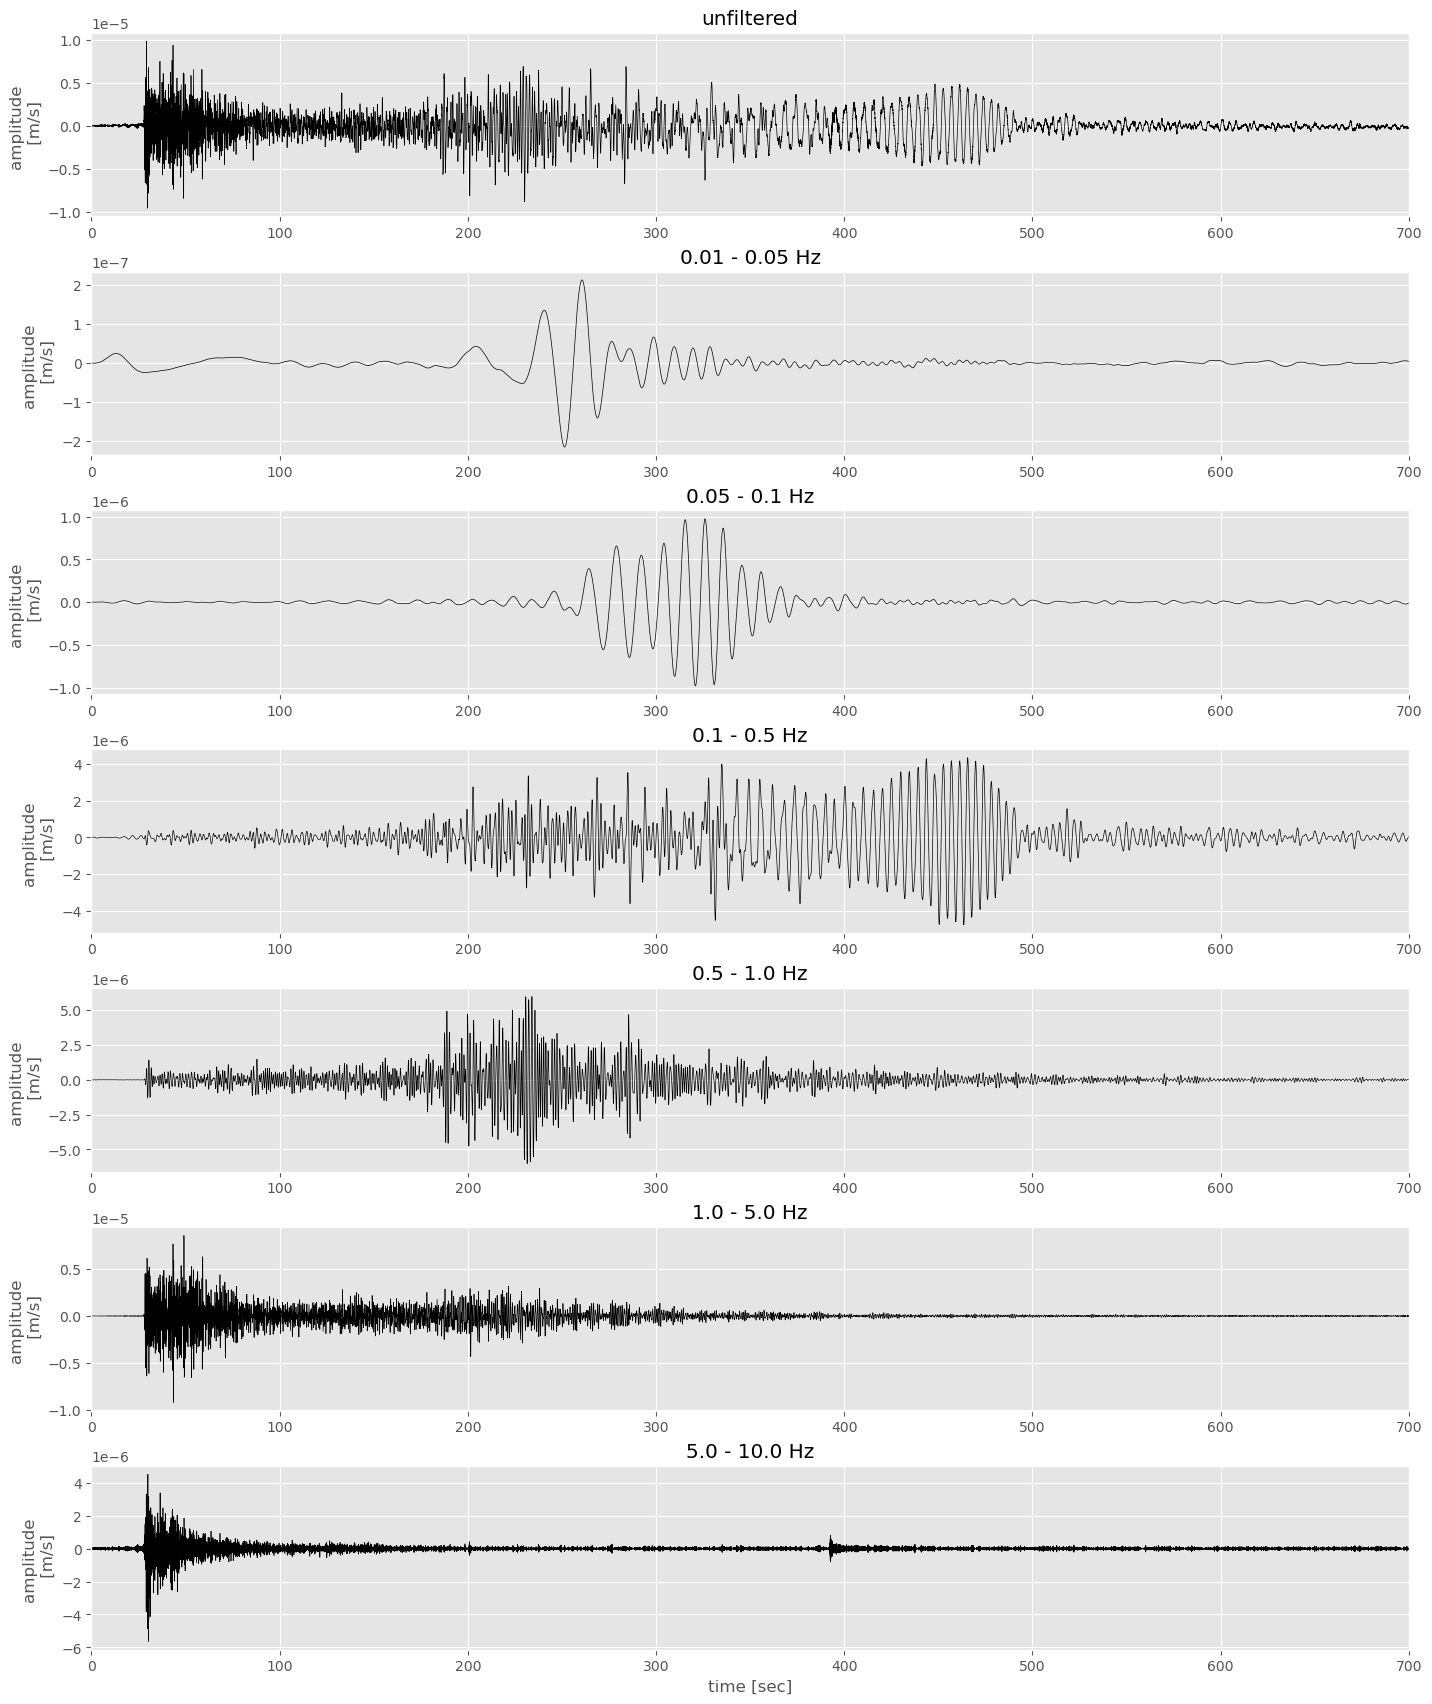

In [9]:
# Cell 5 - filter data in different frequency ranges

chanel = 2
tm = dat[chanel].times()
xmin = 0
xmax = 700

dat1 = dat[chanel].copy()
dat2 = dat[chanel].copy()
dat2.filter(type="bandpass", freqmin=0.01, freqmax=0.05)
dat3 = dat[chanel].copy()
dat3.filter(type="bandpass", freqmin=0.05, freqmax=0.1)
dat4 = dat[chanel].copy()
dat4.filter(type="bandpass", freqmin=0.1, freqmax=0.5)
dat5 = dat[chanel].copy()
dat5.filter(type="bandpass", freqmin=0.5, freqmax=1)
dat6 = dat[chanel].copy()
dat6.filter(type="bandpass", freqmin=1., freqmax=5.)
dat7 = dat[chanel].copy()
dat7.filter(type="bandpass", freqmin=5., freqmax=10.)

plt.rcParams['figure.figsize'] = 17, 21
fig = plt.figure()
ax1 = fig.add_subplot(7,1,1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat1.data, 'k')
plt.xlim(xmin, xmax)
plt.title('unfiltered')
plt.ylabel('amplitude \n [m/s]')
ax2 = fig.add_subplot(7,1,2)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat2.data, 'k')
plt.xlim(xmin, xmax)
plt.title('0.01 - 0.05 Hz')
plt.ylabel('amplitude \n [m/s]')
ax3 = fig.add_subplot(7,1,3)
ax3.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat3.data, 'k')
plt.xlim(xmin, xmax)
plt.title('0.05 - 0.1 Hz')
plt.ylabel('amplitude \n [m/s]')
ax4 = fig.add_subplot(7,1,4)
ax4.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat4.data, 'k')
plt.xlim(xmin, xmax)
plt.title('0.1 - 0.5 Hz')
plt.ylabel('amplitude \n [m/s]')
ax5 = fig.add_subplot(7,1,5)
ax5.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat5.data, 'k')
plt.xlim(xmin, xmax)
plt.title('0.5 - 1.0 Hz')
plt.ylabel('amplitude \n [m/s]')
ax6 = fig.add_subplot(7,1,6)
ax6.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat6.data, 'k')
plt.xlim(xmin, xmax)
plt.title('1.0 - 5.0 Hz')
plt.ylabel('amplitude \n [m/s]')
ax7 = fig.add_subplot(7,1,7)
ax7.ticklabel_format(style='sci', axis='y', scilimits=(-1,1))
plt.plot(tm, dat7.data, 'k')
plt.xlim(xmin, xmax)
plt.title('5.0 - 10.0 Hz')
plt.xlabel('time [sec]')
plt.ylabel('amplitude \n [m/s]')
plt.subplots_adjust(hspace=0.3)
plt.show()